In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [62]:
api_df = pd.read_csv('C:/Users/jeffr/Documents/MTA Info/mta_311_12_26_14_cleaned.csv',low_memory=False)

In [44]:
api_df.head()

,agency,borough,latitude,longitude,open_data_channel_type,late,created_date_day_of_week,Complaint Grouping,Location_Type_Grouping
0,EDC,MANHATTAN,40.734426,-73.987714,ONLINE,False,1,Noise,Public
1,NYPD,MANHATTAN,40.718309,-73.985476,ONLINE,False,1,Noise,Public
2,NYPD,MANHATTAN,40.861550,-73.926897,PHONE,False,1,Noise,Residential
3,NYPD,MANHATTAN,40.721488,-73.995115,ONLINE,False,1,Noise,Residential
4,NYPD,BROOKLYN,40.620056,-73.940781,PHONE,False,1,Traffic,Public


In [45]:
#A little more cleaning

api_df = api_df[~api_df['borough'].isin(['Unspecified'])]
api_df = api_df[~api_df['open_data_channel_type'].isin(['UNKNOWN','OTHER'])]

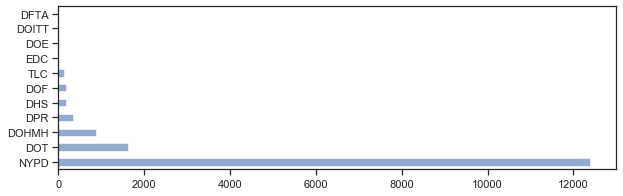

In [46]:
api_df['agency'].value_counts().plot(kind='barh',alpha=0.6,figsize=(10,3))
plt.show()

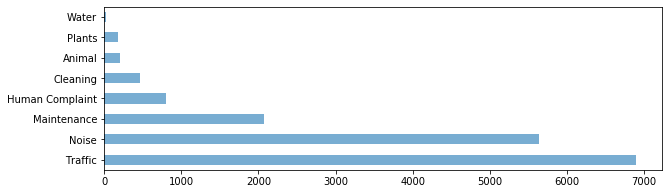

In [8]:
api_df['Complaint Grouping'].value_counts().plot(kind='barh',alpha=0.6,figsize=(10,3))
plt.show()

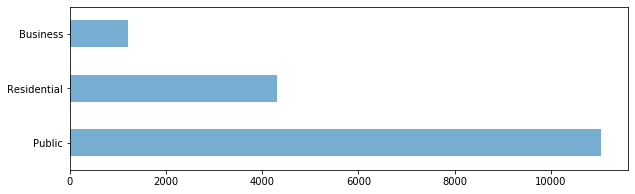

In [9]:
api_df['Location_Type_Grouping'].value_counts().plot(kind='barh',alpha=0.6,figsize=(10,3))
plt.show()

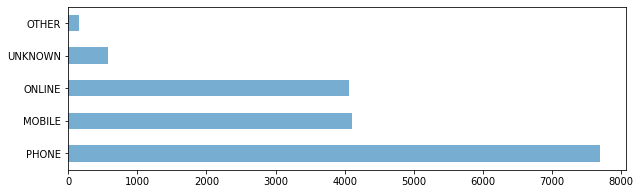

In [17]:
api_df['open_data_channel_type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(10,3))
plt.show()

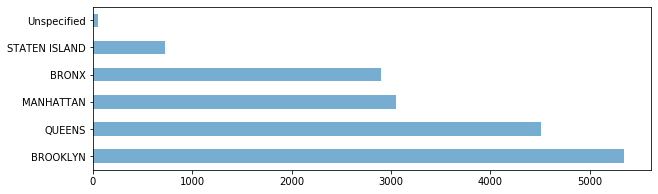

In [11]:
api_df['borough'].value_counts().plot(kind='barh',alpha=0.6,figsize=(10,3))
plt.show()

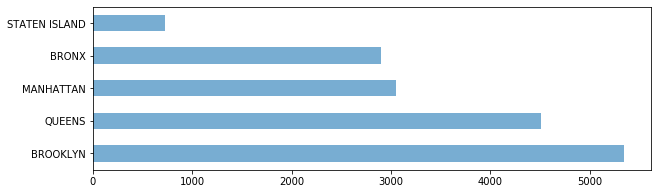

In [13]:
api_df['borough'].value_counts().plot(kind='barh',alpha=0.6,figsize=(10,3))
plt.show()

In [29]:
def Complaint_Grouping(borough_string):
    return api_df[api_df['borough'] == borough_string]['Complaint Grouping'].value_counts().head()

In [30]:
bronx_complaints= Complaint_Grouping('BRONX')
brooklyn_complaints = Complaint_Grouping('BROOKLYN')
manhattan_complaints = Complaint_Grouping('MANHATTAN')
queens_complaints =  Complaint_Grouping('QUEENS')
staten_island_complaints = Complaint_Grouping('STATEN ISLAND')
complaint_variable_list = [bronx_complaints,brooklyn_complaints,
                          manhattan_complaints,queens_complaints,
                          staten_island_complaints]

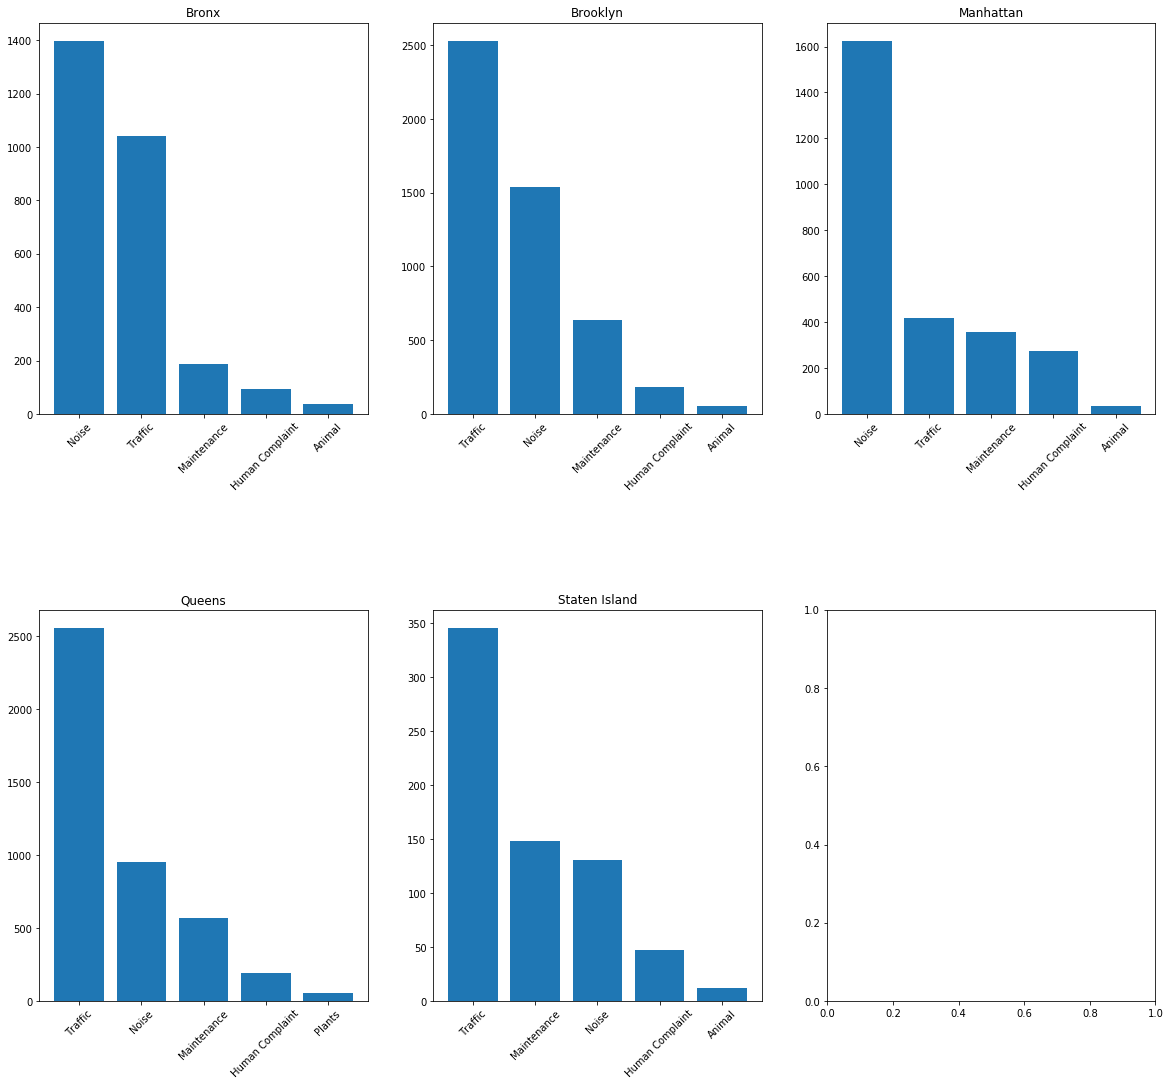

In [34]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20,18))
f.subplots_adjust(hspace=0.5)
# for i , name in enumerate(complaint_variable_list) theres a way to do this
#     axi.bar(range(len(name)),name,tick_label=name.index)
ax1.bar(range(len(bronx_complaints)),bronx_complaints,tick_label=bronx_complaints.index)
ax1.set_title('Bronx')
for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
ax2.bar(range(len(brooklyn_complaints)),brooklyn_complaints,tick_label=brooklyn_complaints.index)
ax2.set_title('Brooklyn')
for tick in ax2.get_xticklabels():
        tick.set_rotation(45)
ax3.bar(range(len(manhattan_complaints)),manhattan_complaints,tick_label=manhattan_complaints.index)
ax3.set_title('Manhattan')
for tick in ax3.get_xticklabels():
        tick.set_rotation(45)
ax4.bar(range(len(queens_complaints)),queens_complaints,tick_label=queens_complaints.index)
ax4.set_title('Queens')
for tick in ax4.get_xticklabels():
        tick.set_rotation(45)
ax5.bar(range(len(staten_island_complaints)),staten_island_complaints,tick_label=staten_island_complaints.index)
ax5.set_title('Staten Island')
for tick in ax5.get_xticklabels():
        tick.set_rotation(45)
# for tick in ax6.get_xtigcklabels():
#         tick.set_rotation(10)

In [63]:
api_df= pd.get_dummies(api_df, columns=['agency','borough',
                                      'Complaint Grouping','open_data_channel_type','Location_Type_Grouping'])

In [55]:
api_df.head()

,latitude,longitude,late,created_date_day_of_week,agency_DFTA,agency_DHS,agency_DOE,agency_DOF,agency_DOHMH,agency_DOITT,...,Complaint Grouping_Traffic,Complaint Grouping_Water,open_data_channel_type_MOBILE,open_data_channel_type_ONLINE,open_data_channel_type_OTHER,open_data_channel_type_PHONE,open_data_channel_type_UNKNOWN,Location_Type_Grouping_Business,Location_Type_Grouping_Public,Location_Type_Grouping_Residential
0,40.734426,-73.987714,False,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,40.718309,-73.985476,False,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,40.861550,-73.926897,False,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,40.721488,-73.995115,False,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,40.620056,-73.940781,False,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [56]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16587 entries, 0 to 16586
Data columns (total 38 columns):
latitude                              16587 non-null float64
longitude                             16587 non-null float64
late                                  16587 non-null bool
created_date_day_of_week              16587 non-null int64
agency_DFTA                           16587 non-null uint8
agency_DHS                            16587 non-null uint8
agency_DOE                            16587 non-null uint8
agency_DOF                            16587 non-null uint8
agency_DOHMH                          16587 non-null uint8
agency_DOITT                          16587 non-null uint8
agency_DOT                            16587 non-null uint8
agency_DPR                            16587 non-null uint8
agency_DSNY                           16587 non-null uint8
agency_EDC                            16587 non-null uint8
agency_NYPD                           16587 non-null uint8
age

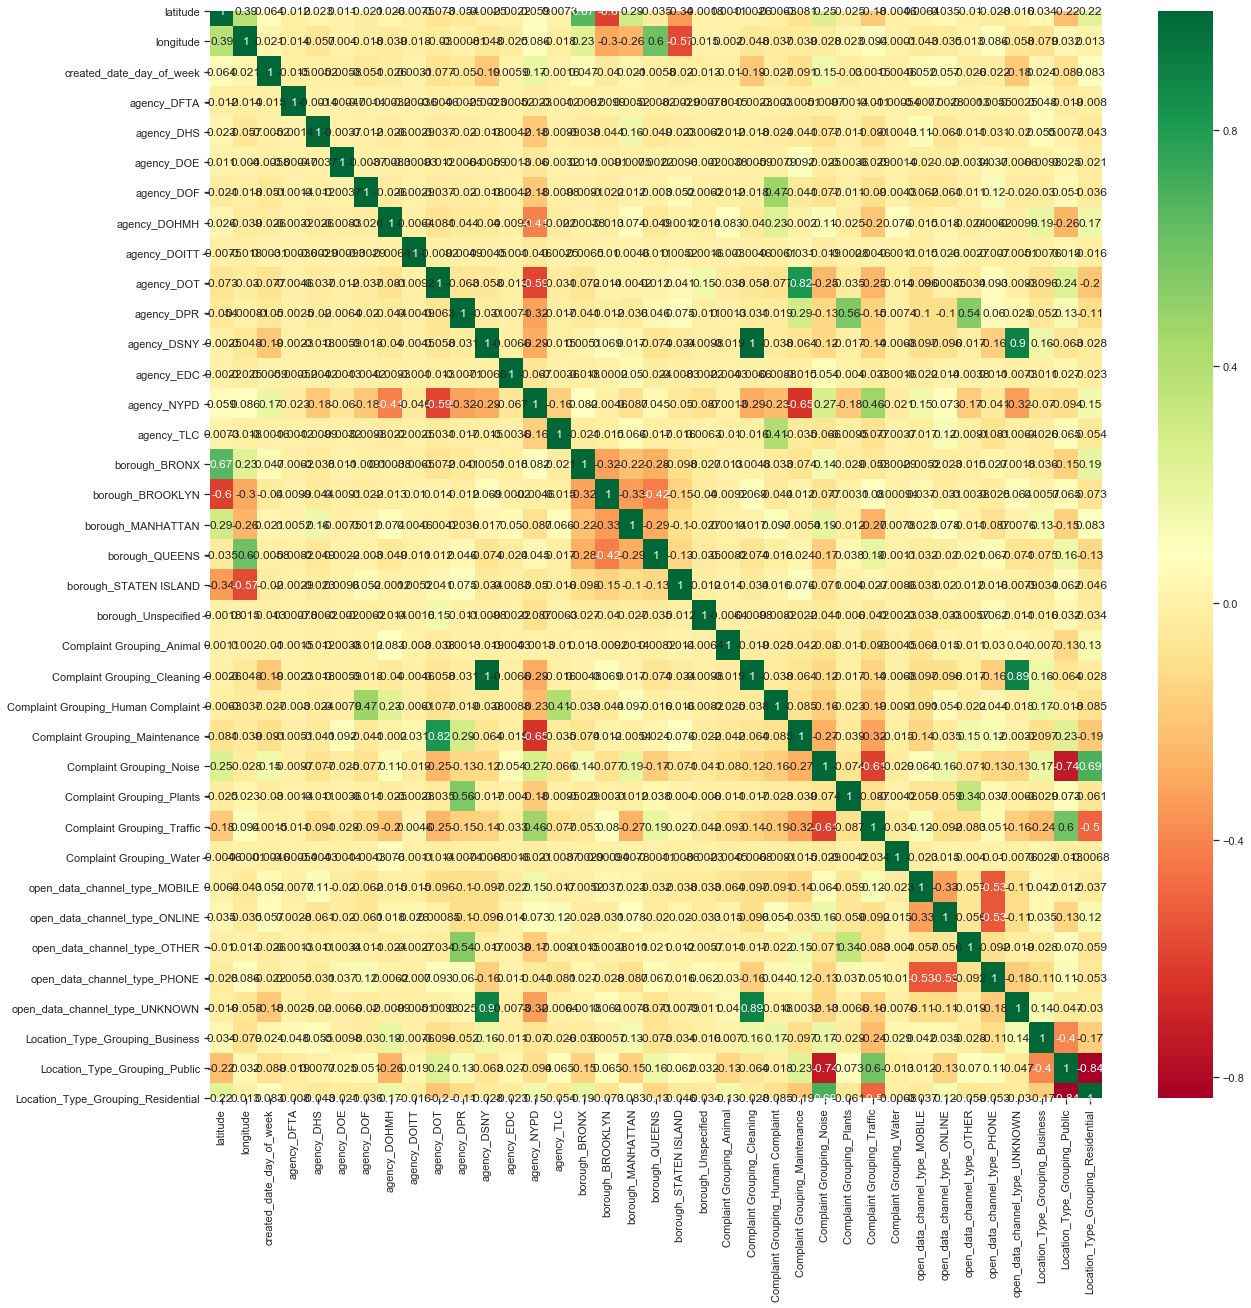

In [58]:
import seaborn as sns

y = api_df.pop('late')  #target
x = api_df    #featurese
#get correlations of each features in dataset
corrmat = api_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(api_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [64]:
api_df.to_csv('C:/Users/jeffr/Documents/MTA Info/mta_311_12_26_14_dummies.csv',  index = False)